In [1]:
import numpy as np
from scipy import stats as sps
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
current_state = np.array([0, 0, 0])
STD_STEP = 422 * 2 / np.sqrt(np.pi)
STEP_NUMBER = 10000
k_b = 1.3806e-23
M = 4.65e-26
T = 300
CHAIN_NUMBER = 5
states = []
norms = []
for chain in tqdm(range(CHAIN_NUMBER)):
    cur_norms = []
    cur_states = []
    for step in tqdm(range(STEP_NUMBER)):
        current_step = STD_STEP*sps.uniform(-1, 2).rvs(3)
        next_state = current_state + current_step
        if np.linalg.norm(next_state, ord=2) > np.linalg.norm(current_state, ord=2):  # условие повышения энергии
            a = sps.uniform().rvs(1)[0]
            delta = np.linalg.norm(next_state, ord=2)**2 - np.linalg.norm(current_state, ord=2)**2
            if a < np.exp(-(delta * M / 2)/(k_b * T)):  # правило выбора
                current_state = next_state
        else:  # понижение энергии
            current_state = next_state
        if step > 5000:
            cur_states.append(current_state)
            cur_norms.append(np.linalg.norm(current_state, ord=2))
    norms.append(cur_norms)
    states.append(cur_states)

In [41]:
x = np.arange(0, 1500)
def boltz(x):
    a = np.sqrt(k_b * T / M)
    const = np.sqrt(2 / np.pi) / a ** 3 
    return const* (x ** 2) * np.exp(-(x**2)/(2*a**2))
y = boltz(x)

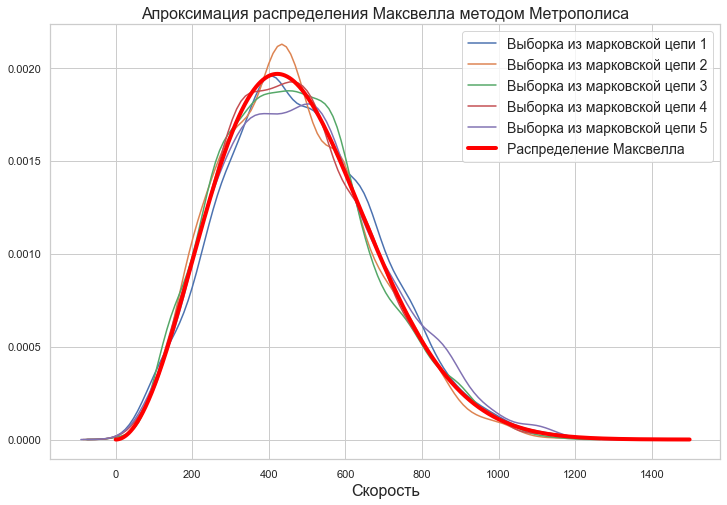

In [54]:
plt.figure(figsize=(12,8))
plt.title('Апроксимация распределения Максвелла методом Метрополиса', fontsize=16)
for idx, chain in enumerate(norms):
    sns.kdeplot(chain, label='Выборка из марковской цепи {}'.format(idx+1))
plt.plot(x, y, label='Распределение Максвелла', linewidth=4, color='red')
plt.legend(fontsize=14)
plt.xlabel('Скорость', fontsize=16)
plt.show()

In [55]:
states = np.array(states)

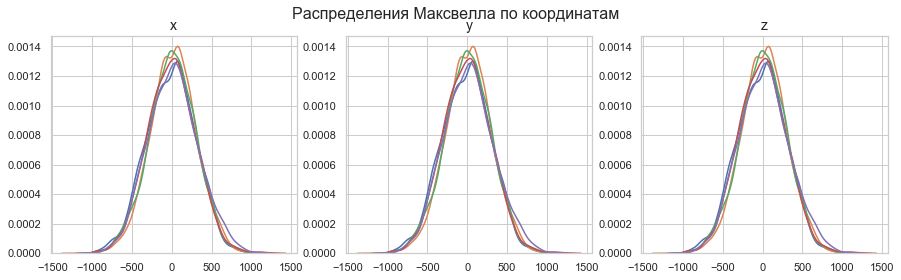

In [56]:
plt.figure(figsize=(15, 4))
titles = ['x', 'y', 'z']
for coordinate, title in enumerate(titles):
    plt.subplot(1, 3, coordinate + 1)
    for state in states:
        sns.kdeplot(state[:, 0])
    #plt.plot(x, y, linewidth=3, color='r')
    plt.title(title, fontsize=14)
plt.suptitle('Распределения Максвелла по координатам', fontsize=16)
plt.show()